## 方程式與斜率
#### 基本運算轉換

In [1]:
# 讀取Lemonade.csv檔案

import pandas as pd

df = pd.read_csv('Lemonade.csv')
df[:3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10
1,02/01/2017,Monday,28.9,1.33,15,0.3,13
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15


In [2]:
# 計算斜率與截距（numpy可以計算線性迴歸分析的斜率與截距）
# y = mx + b （斜率m、截距b）

# np.polyfit?
# np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)

col = 'Temperature'

import numpy as np

result = np.polyfit(x = df[col], y = df['Sales'], deg = 1 )
print(result)

[ 0.42130056 -0.26281451]


In [3]:
m, b = result[0], result[1]
# y = mx + b
y = m * df[col] + b
y

0      11.112301
1      11.912772
2      14.272055
3      18.316540
4      17.600329
         ...    
360    17.726719
361    15.662347
362    16.378557
363    12.755373
364     6.098824
Name: Temperature, Length: 365, dtype: float64

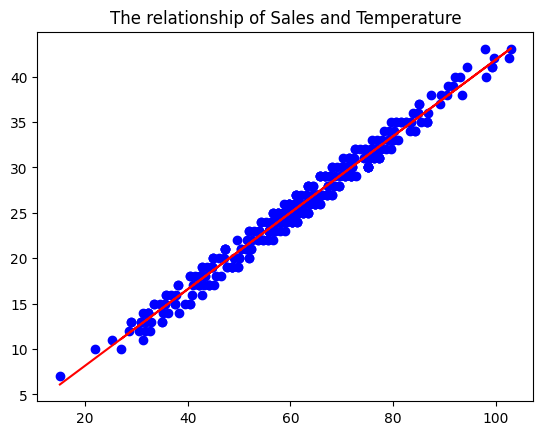

In [4]:
# 繪製圖表

import matplotlib.pyplot as plt

plt.scatter(df[col], df['Sales'], color = 'blue') # 真正數據
plt.plot(df[col], y, color = 'red')               # 預測數據
plt.title('The relationship of Sales and {}'.format(col))
plt.show()

#### 試作：col改為'Rainfall'，並在x加上對數

In [5]:
col = 'Rainfall'

import numpy as np

result = np.polyfit(x = np.log(df[col]) , y = df['Sales'], deg = 1 )
print(result)

[-23.31011221  19.84591178]


In [7]:
m, b = result[0], result[1]
# y = mx + b
y = m * df[col] + b
y

0     -26.774313
1     -11.156537
2     -11.156537
3      -4.629706
4      -3.464200
         ...    
360    -3.464200
361    -9.291728
362    -9.291728
363   -13.487549
364   -38.429369
Name: Rainfall, Length: 365, dtype: float64

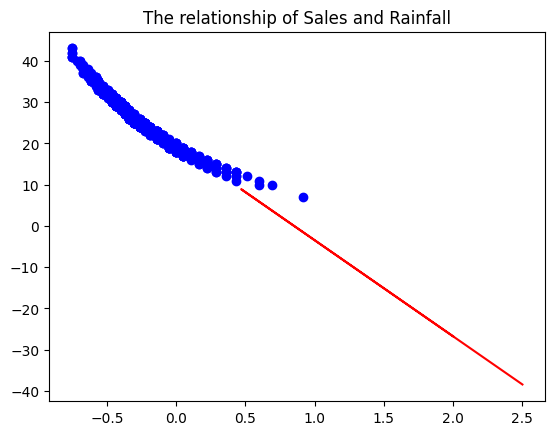

In [8]:
# 繪製圖表
# 自然對數可以增加模型預測的精準度

import matplotlib.pyplot as plt

plt.scatter(np.log(df[col]), df['Sales'], color = 'blue') # 真正數據 + 自然對數
plt.plot(df[col], y, color = 'red')                       # 預測數據
plt.title('The relationship of Sales and {}'.format(col))
plt.show()

#### 等量原理與移項法則

[5 6 7]


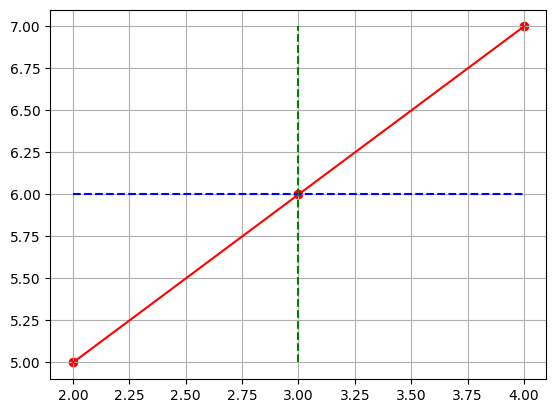

In [12]:
# 線性方程式
# f(x) = y = X＋3 ＝ 6

def f(x):
    return(x + 3)

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(2, 5, 1)
y = f(x)
print(y)

plt.scatter(x, y, color = 'red')
plt.plot(x, y, color = 'red')

plt.hlines(y = 6, xmin = 2, xmax = 4, color = 'blue', linestyles = 'dashed')  # 水平線
plt.vlines(x = 3, ymin = 5, ymax = 7, color = 'green', linestyles = 'dashed') # 垂直線
# plt.axhline(y = 6, color = 'blue')
plt.grid()
plt.show()

## 函數概念與表示

In [13]:
# Python 函數
# z：independent variable
# output | return | f：dependent variable

def f(z):
    return(1 if z >= 0 else -1)
f(6)

1

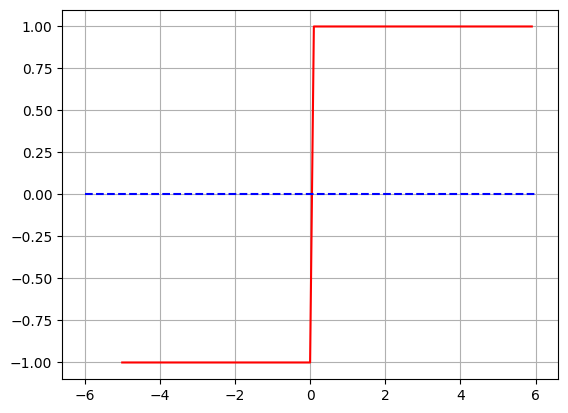

In [21]:
# Machine Learning：activation function

import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-5, 6, 0.1)
y = [f(x) for x in X]
plt.plot(X, y, color = 'red')
plt.hlines(y = 0, xmin = -6, xmax = 6, color = 'blue', linestyles = 'dashed')
plt.grid()
plt.show()

In [1]:
import numpy as np

def f(z):
    return(np.where(z >= 0, 1, 0))
X = np.arange(-5, 6, 0.1)
f(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


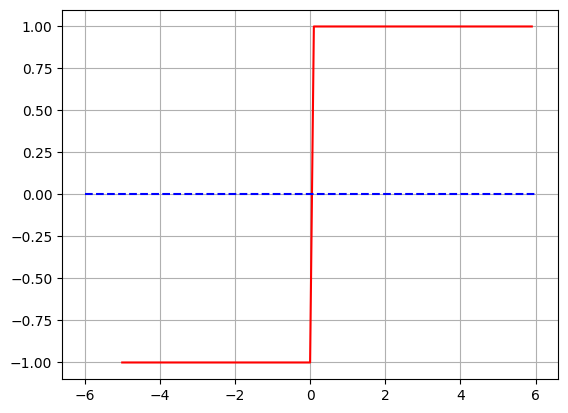

In [2]:
# 改變f(z)寫法可以支援以下，並且繪製出正確圖表

def f(z):
    return(np.where(z >=0 , 1, -1) )
X = np.arange(-5, 6, 0.1)
print(f(X))

import matplotlib.pyplot as plt
X = np.arange(-5, 6, 0.1)
y = f(X)
plt.plot(X, y, color = 'red')
plt.hlines(y = 0, xmin = -6, xmax = 6, color = 'blue', linestyles = 'dashed')
plt.grid()
plt.show()

## 指數對數與極限
#### 二次函數

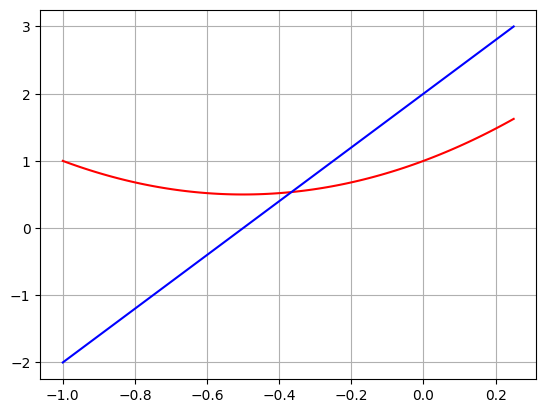

In [4]:
# y = f(x) = 2*x^2 + 2*x + 1
# 頂點

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return( 2*x*x + 2*x + 1)

def fd(x):
    return(4*x + 2)

x = np.linspace(-1, 0.25, 100)
y = f(x)
yd = fd(x)

plt.plot(x, y, color = 'red')
plt.plot(x, yd, color = 'blue')
plt.grid()
plt.show()

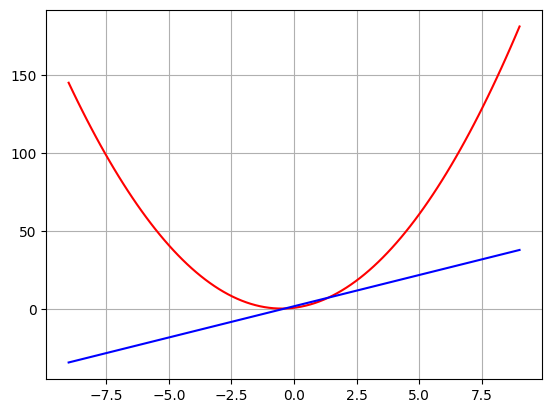

In [5]:
# y = f(x) = 2*x^2 + 2*x + 1

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return( 2*x*x + 2*x + 1)

def fd(x):
    return(4*x + 2)
    
    
x = np.linspace(-9, 9, 100)
y = f(x)
yd = fd(x)

plt.plot(x, y, color = 'red')
plt.plot(x, yd, color = 'blue')
plt.grid()
plt.show()

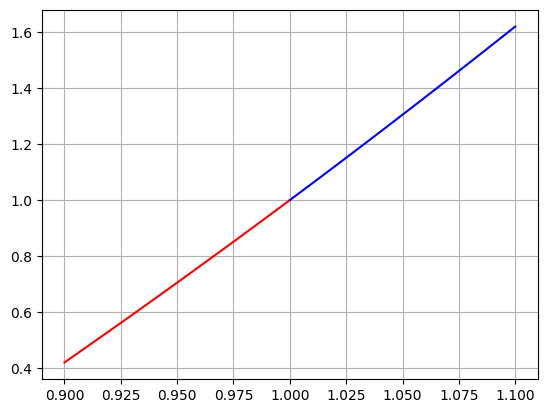

In [6]:
# 函數的極限

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return( 2*x*x + 2*x - 3)

    
xL = np.linspace(0.9, 0.9999, 100)
xR = np.linspace(1.0001, 1.1, 100)
yL = f(xL)
yR = f(xR)

plt.plot(xL, yL, color = 'red')
plt.plot(xR, yR, color = 'blue')
plt.grid()
plt.show()

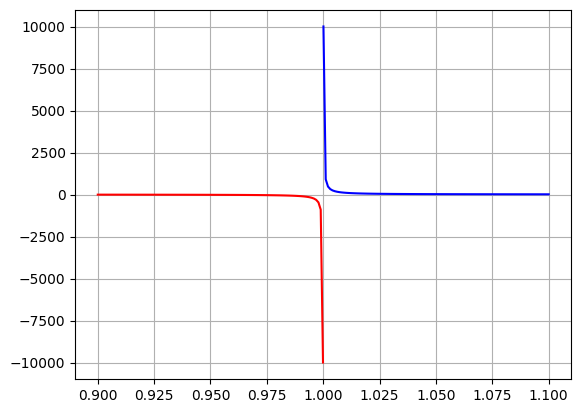

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return((2*x*x + 2*x - 3) / (x-1))

    
xL = np.linspace(0.9, 0.9999, 100)
xR = np.linspace(1.0001, 1.1, 100)
yL = f(xL)
yR = f(xR)

plt.plot(xL, yL, color = 'red')
plt.plot(xR, yR, color = 'blue')
plt.grid()
plt.show()

## HW：方程式轉為圖表

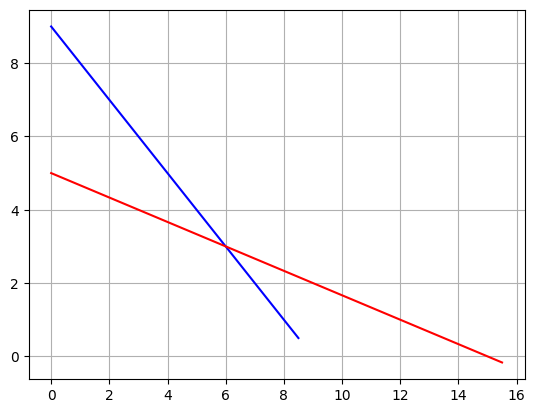

In [9]:
'''
有以下兩個方程式
x＋y＝9
5a＋15b＝75
請將這兩個方程式以圖表方式顯示
'''

import numpy as np

a = np.arange(0, 16, 0.5)
x = np.arange(0, 9, 0.5)

def fxy(x):
    return( 9 - x)

def fab(a):
    return( (15 - 1*a) / 3 )

import matplotlib.pyplot as plt

plt.plot(x, fxy(x), color = 'blue')
plt.plot(a, fab(a), color = 'red')
plt.grid()
plt.show()